In [19]:
import numpy as np
import pandas
from sklearn.model_selection import train_test_split, GridSearchCV

# We generate 1000 points, with 2 features, and 2 classes
# Let's pick a center for each class
center1 = np.array([0, 0])
center2 = np.array([1, 1])
# We generate 500 points around each center, distributed normally
data1 = np.random.normal(loc=center1, # mean
scale=(0.5, 0.3), # std deviation
size=(500, 2))
data2 = np.random.normal(loc=center2, # mean
scale=(0.3, 0.5), # std deviation
size=(500, 2))
# We create the labels
labels1 = np.zeros(500)
labels2 = np.ones(500)
# We concatenate the data and the labels
data1 = np.concatenate((data1, labels1.reshape(-1, 1)), axis=1)
data2 = np.concatenate((data2, labels2.reshape(-1, 1)), axis=1)
# We concatenate the two classes
data = np.concatenate((data1, data2), axis=0)
# We shuffle the data
np.random.shuffle(data)
# We split the data into train, and test sets
train, test = train_test_split(data, test_size=0.2)
# (optional)
# We make a dataframe to plot the data, with columns x, y, label, set
train_df = pandas.DataFrame(train, columns=['x', 'y', 'label'])
train_df['set'] = 'train'
test_df = pandas.DataFrame(test, columns=['x', 'y', 'label'])
test_df['set'] = 'test'
data_df = pandas.concat([train_df, test_df], axis=0)
del train_df, test_df
# We save the data
np.save('./data/generated_data.npy', data)
np.save('./data/generated_data_train.npy', train)
np.save('./data/generated_data_test.npy', test)
data_df.to_csv('./data/generated_data.csv', index=False)

You can visualise the dataset with the below code snippet

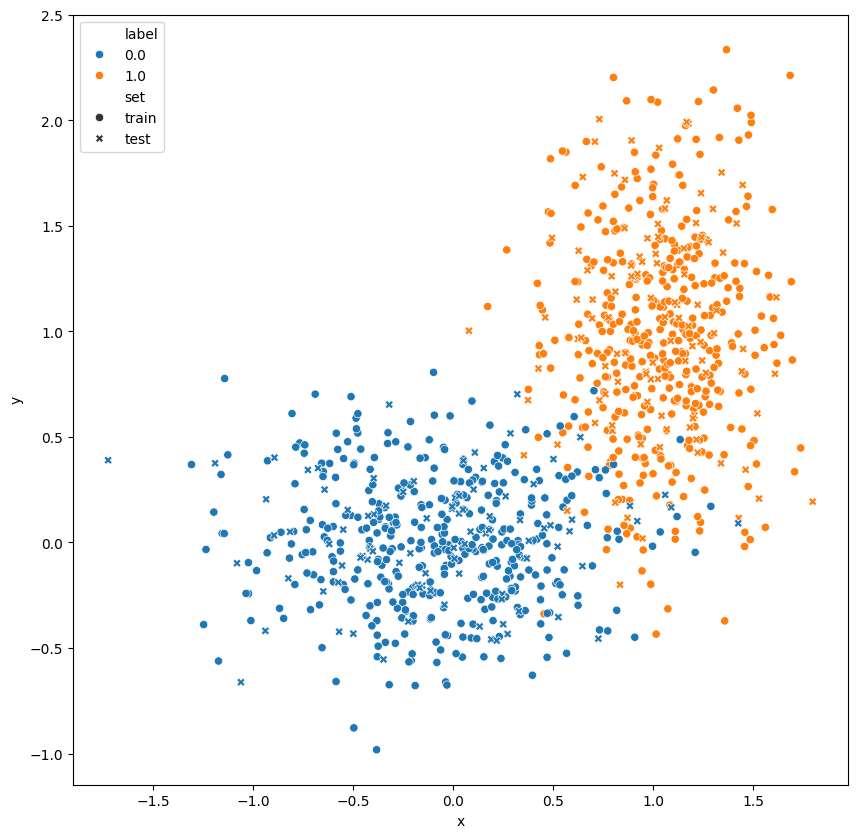

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x='x', y='y', hue='label', style='set', data=data_df)
plt.show()

SVC - RBF

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters:  {'C': 1, 'gamma': 'auto'}


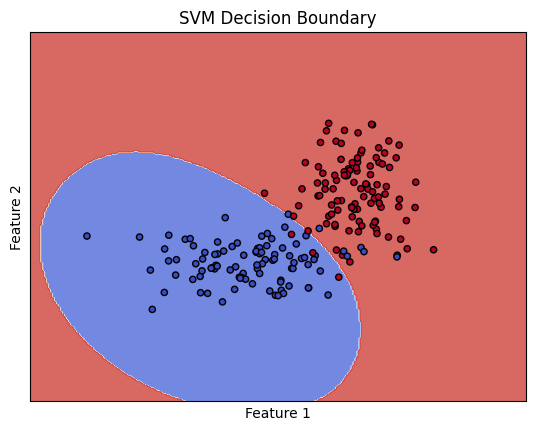

In [21]:
from sklearn.svm import SVC

# Separate features and labels
X_train = train[:, :2]  # first two columns are features
y_train = train[:, 2]   # last column is the label

X_test = test[:, :2]  # first two columns are features
y_test = test[:, 2]   # last column is the label

# Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10, 25, 50], 
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 
}

# Initialize the GridSearchCV object for rbf
grid_search_rbf = GridSearchCV(SVC(probability=True, kernel="rbf"), param_grid, cv=3, scoring='f1_micro', verbose=1)

grid_search_rbf.fit(X_train, y_train)

# Create mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# The best hyperparameters found
print("Best Parameters: ", grid_search_rbf.best_params_)

# svc model with the best parameters
model_svc_rbf = grid_search_rbf.best_estimator_

# Predict classifications for each point in the meshgrid
Z_rbf = model_svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM Decision Boundary')
plt.show()

SVC - Linear

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters:  {'C': 0.1, 'gamma': 'scale'}


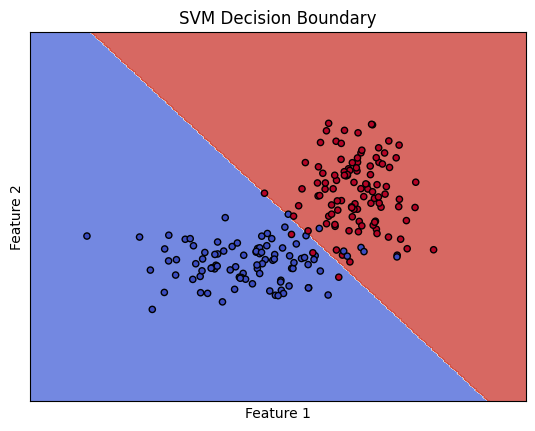

In [22]:
# Create mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Initialize the GridSearchCV object for linear
grid_search_linear = GridSearchCV(SVC(probability=True, kernel="linear"), param_grid, cv=3, scoring='f1_micro', verbose=1)

grid_search_linear.fit(X_train, y_train)

# The best hyperparameters found
print("Best Parameters: ", grid_search_linear.best_params_)

# svc model with the best parameters
model_svc_linear = grid_search_linear.best_estimator_

# Predict classifications for each point in the meshgrid
Z_linear = model_svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM Decision Boundary')
plt.show()

SVC - Poly

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters:  {'C': 1, 'gamma': 'scale'}


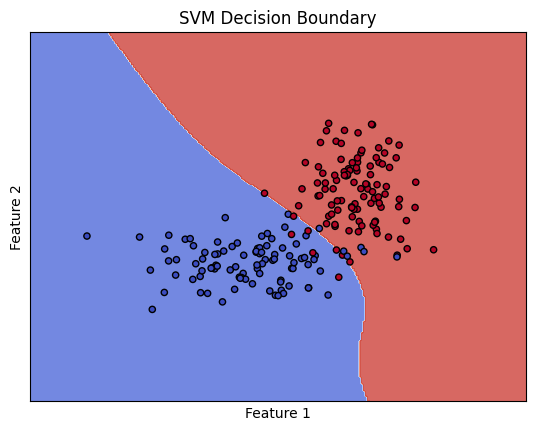

In [23]:
# Create mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Initialize the GridSearchCV object for poly
grid_search_poly = GridSearchCV(SVC(probability=True, kernel="poly"), param_grid, cv=3, scoring='f1_micro', verbose=1)

grid_search_poly.fit(X_train, y_train)

# The best hyperparameters found
print("Best Parameters: ", grid_search_poly.best_params_)

# svc model with the best parameters
model_svc_poly = grid_search_poly.best_estimator_

# Predict classifications for each point in the meshgrid
Z_poly = model_svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z_poly, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM Decision Boundary')
plt.show()